<a href="https://colab.research.google.com/github/nezihaksu/Bank_Marketing_Analysis/blob/main/Term_Deposit_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

# Preparing and Cleaning Dataset

In [2]:
#Raw dataset before preparaing.
df = pd.read_csv(r'/content/drive/MyDrive/bank-full.csv',sep = "?")
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [3]:
quotes_strip = list(df.columns)[0].replace('"','')
columns_split = quotes_strip.split(';')
columns_split
df = df[df.iloc[:,0].name].str.split(pat = ';',expand = True)
df.columns =  columns_split
df.replace('"','',regex = True,inplace = True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.dtypes
#Object data type is not eligible to work with in modelling.

age          object
job          object
marital      object
education    object
default      object
balance      object
housing      object
loan         object
contact      object
day          object
month        object
duration     object
campaign     object
pdays        object
previous     object
poutcome     object
y            object
dtype: object

In [5]:
#Unique returns values in the dataset without duplicates and also enables us to see missing values,if there are.
def unique_missing_values(df):
  #Checking existence of null values.
  null_sum = [df[column].isnull().sum() for column in list(df.columns.values)]
  null_sum_dict = dict(zip(list(df.columns.values),null_sum))
  print('NULL VALUE COUNTS PER FEATURE')
  print(null_sum_dict)
  #Unique values that are in features.
  for column in df.columns:
    print(column.upper())
    print(df["{}".format(column)].unique())
unique_missing_values(df)
#No null values and no uniques values that does not make sense.

NULL VALUE COUNTS PER FEATURE
{'age': 0, 'job': 0, 'marital': 0, 'education': 0, 'default': 0, 'balance': 0, 'housing': 0, 'loan': 0, 'contact': 0, 'day': 0, 'month': 0, 'duration': 0, 'campaign': 0, 'pdays': 0, 'previous': 0, 'poutcome': 0, 'y': 0}
AGE
['58' '44' '33' '47' '35' '28' '42' '43' '41' '29' '53' '57' '51' '45'
 '60' '56' '32' '25' '40' '39' '52' '46' '36' '49' '59' '37' '50' '54'
 '55' '48' '24' '38' '31' '30' '27' '34' '23' '26' '61' '22' '21' '20'
 '66' '62' '83' '75' '67' '70' '65' '68' '64' '69' '72' '71' '19' '76'
 '85' '63' '90' '82' '73' '74' '78' '80' '94' '79' '77' '86' '95' '81'
 '18' '89' '84' '87' '92' '93' '88']
JOB
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
MARITAL
['married' 'single' 'divorced']
EDUCATION
['tertiary' 'secondary' 'unknown' 'primary']
DEFAULT
['no' 'yes']
BALANCE
['2143' '29' '2' ... '8205' '14204' '16353']
HOUSING
['yes' 'no']
LOAN
['no'

In [6]:
#Type of person in the dataset is at the age of 32,blue-coller working class,married and has secondary education.
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,77,12,3,4,2,7168,2,2,3,31,12,1573,48,559,41,4,2
top,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no
freq,2085,9732,27214,23202,44396,3514,25130,37967,29285,2752,13766,188,17544,36954,36954,36959,39922


# Visualization

In [7]:
df.hist(column="balance")
#Most of people have balance less 10.000 dollars in the bank. 

ValueError: ignored

In [8]:
df.hist(column="age")
#People who are between the ages of 35-40 are the majority.

ValueError: ignored

In [9]:
df.hist(column="duration")
#Call duration on the phone in seconds.
#Most of calls take around 9 minutes.

ValueError: ignored

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


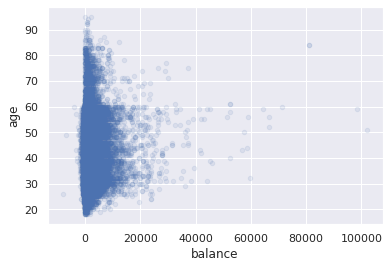

In [10]:
df.balance = df.balance.astype('int')
df.age = df.age.astype('int')
df.plot(x = 'balance',y = 'age',kind = 'scatter',alpha = 0.1)
#Ages between 30 and 60 have the most balances.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

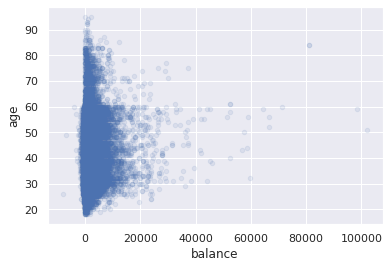

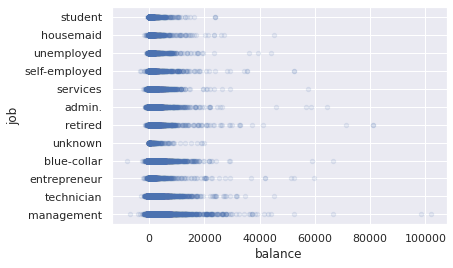

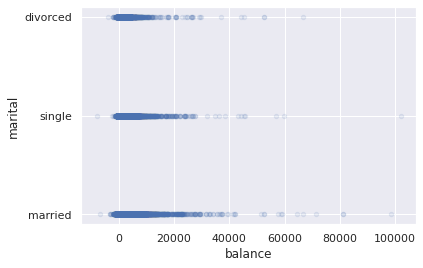

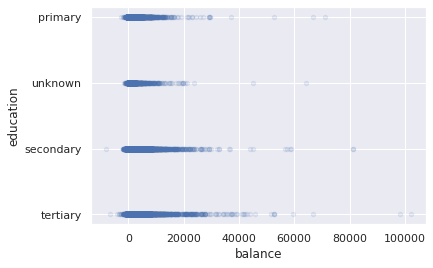

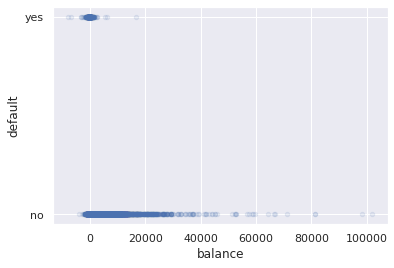

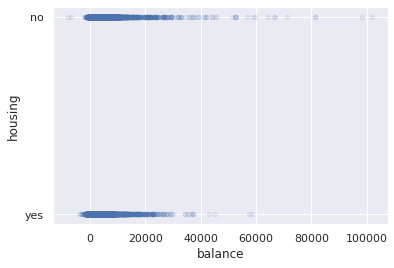

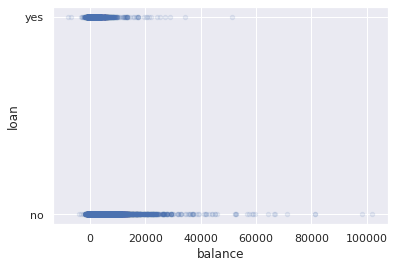

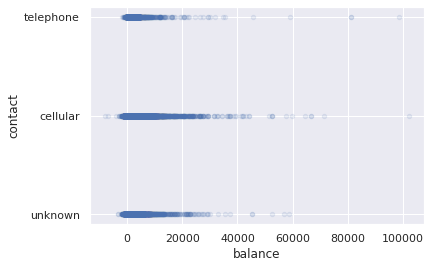

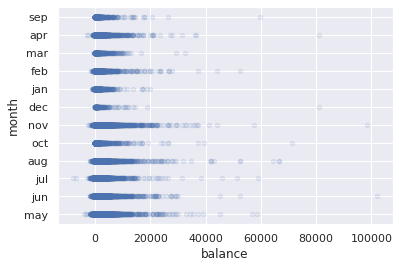

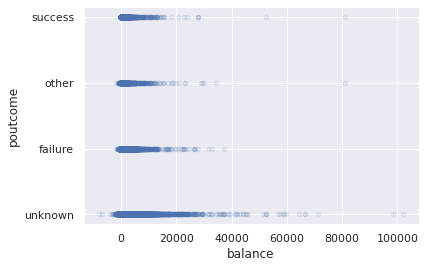

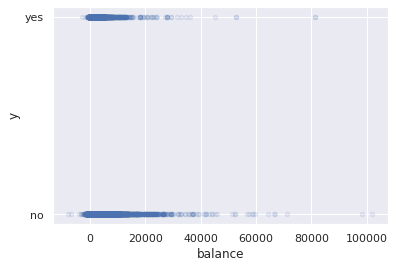

In [11]:
for column in df.columns:
  if column not in ["balance","day","duration","campaign","pdays","previous"]:
    df.plot(x = "balance",y = column,kind = "scatter",alpha = 0.1)
#It shows how much balance does most of the people in each category have.
#According to subscription and balance scatter graph,people who did not subscribed has more balance than who did.
#Management type of jobs also have the most of balance amount whereas unkown category has the least amount.
#Balance difference between secondary and tertiary education is so small.
#People who have house loan have more balance.

In [12]:
#Converts features that have letters into categorical.
def convert_categorical(df):
    categorical_features = []
    letter_pattern = re.compile(r'[A-z]')
    #If values types are all str or int,it is impossible to distinguish them with this method,so i prefer to do it with regex.
    for column in df.columns.values:
      if letter_pattern.match(str(df[column].values[0])):
          df[column] = pd.Categorical(df[column])
          categorical_features.append(df[column].name)
        
    return set(categorical_features)
convert_categorical(df)
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day            object
month        category
duration       object
campaign       object
pdays          object
previous       object
poutcome     category
y            category
dtype: object

In [13]:
#Object type features.
df.dtypes[df.dtypes == "object"].index

Index(['day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [14]:
df["day"] = df["day"].astype("int64")
df["duration"] = df["duration"].astype("int64")
df["campaign"] = df["campaign"].astype("int64")
df["pdays"] = df["pdays"].astype("int64")
df["previous"] = df["previous"].astype("int64")
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [15]:
feature_list = df.columns

def groupby_method(groupby_features,method):
        series_groupby = df[groupby_features].groupby(df[groupby_features].iloc[:,-1].name)
        if method == 'sum':
            return series_groupby.sum()
        elif method == 'mean':
            return series_groupby.mean()
    
def groupby_bar(groupby_df,bar_feature='balance'):
    plt.figure(figsize = (15,5))
    plt.bar(groupby_df.index.values,groupby_df[bar_feature],label = bar_feature)
    plt.ylabel('$',rotation = 0)
    plt.xlabel(groupby_df.index.name)
    plt.legend(prop={'size': 20})

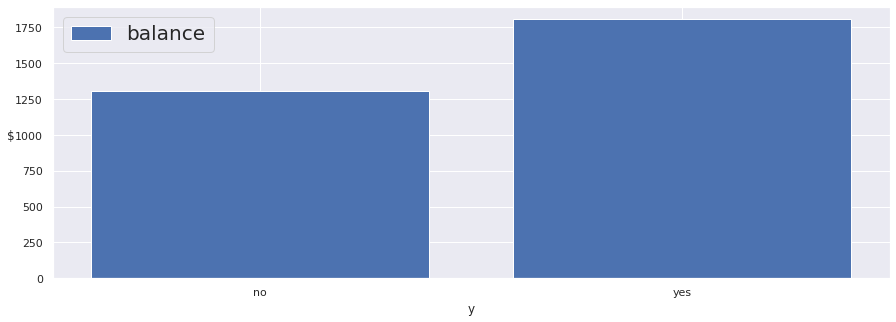

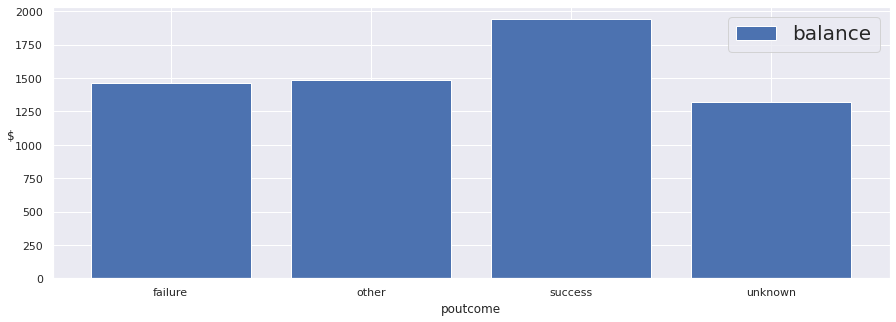

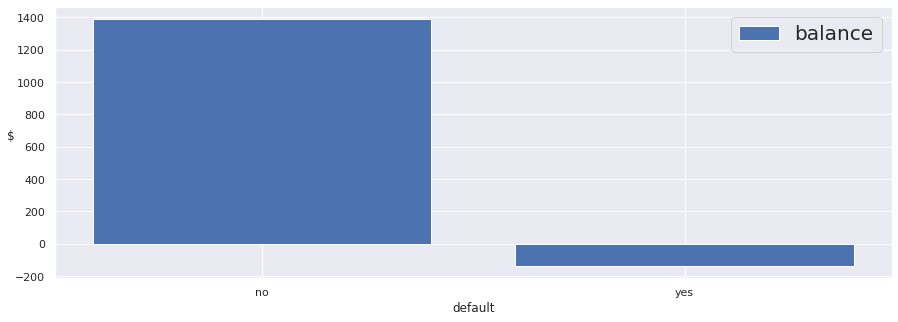

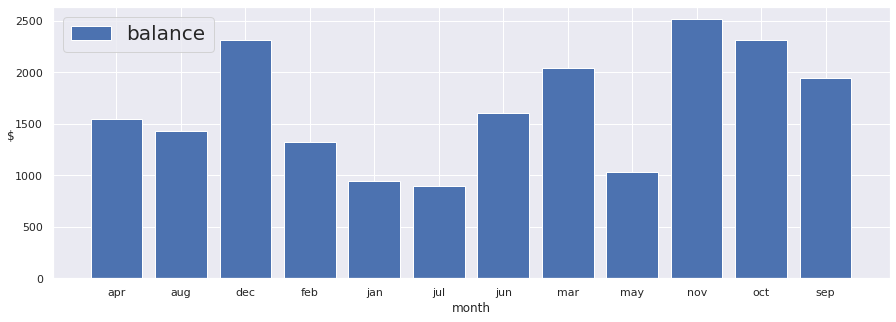

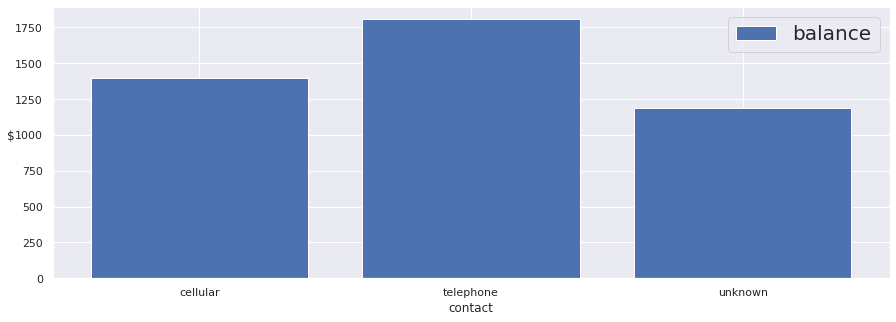

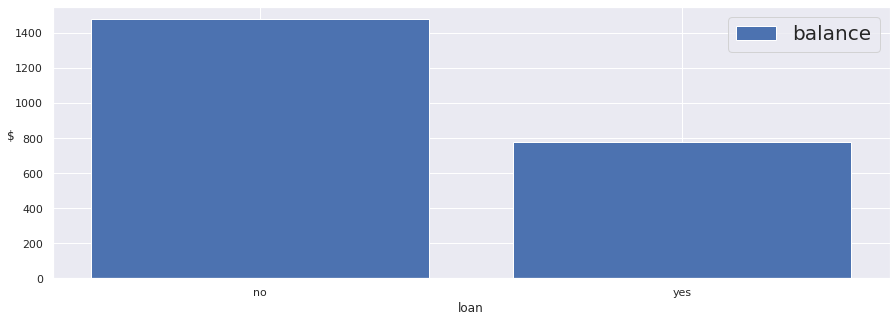

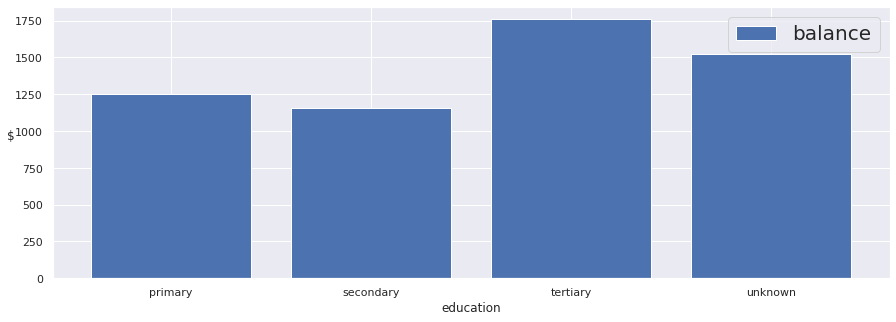

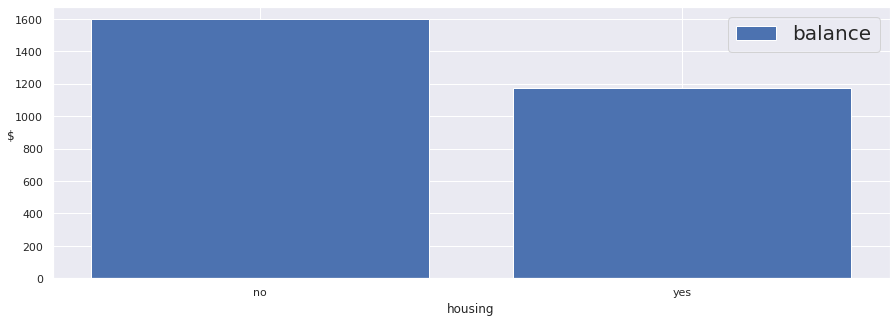

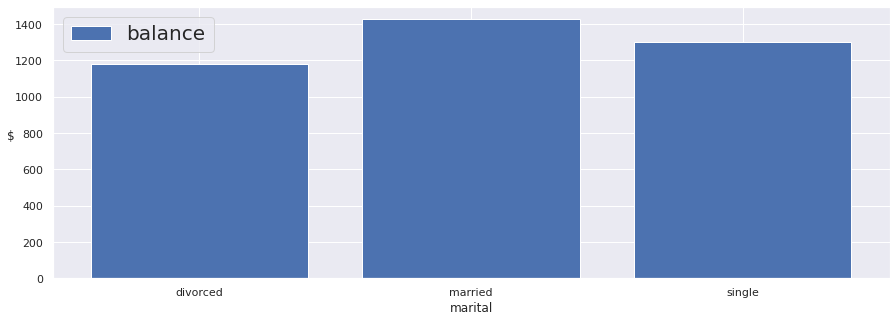

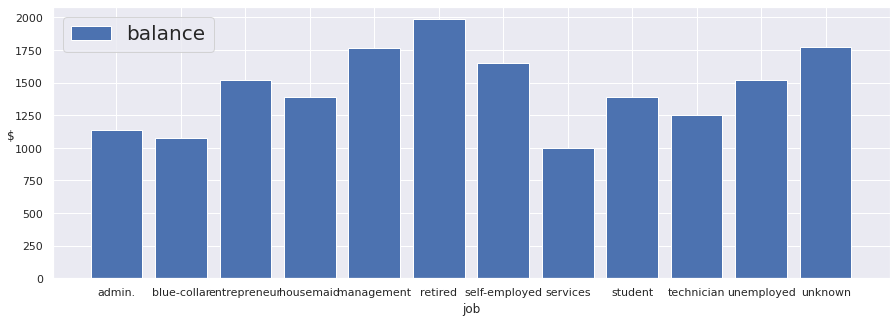

In [16]:
categorical_features = list(convert_categorical(df))
numerical_features = [name for name in feature_list if name not in categorical_features]

#unless numerical features are converted into int,it won't group them by categorical ones.
for feature in numerical_features:
    df[feature] = df[feature].astype('int')
    
groupby_lists = []
for groupby_name in categorical_features:
    groupby_list = numerical_features[:]
    groupby_list.append(groupby_name)
    groupby_lists.append(groupby_list)

def groupby_graph(groupby_feature,method = "mean"):
  for feature_list in groupby_lists:
          groupby_bar(groupby_method(feature_list,method=method),bar_feature=groupby_feature)
groupby_graph("balance")
#Categorical features are grouped by Balance.Y axis is mean of balance for each category.

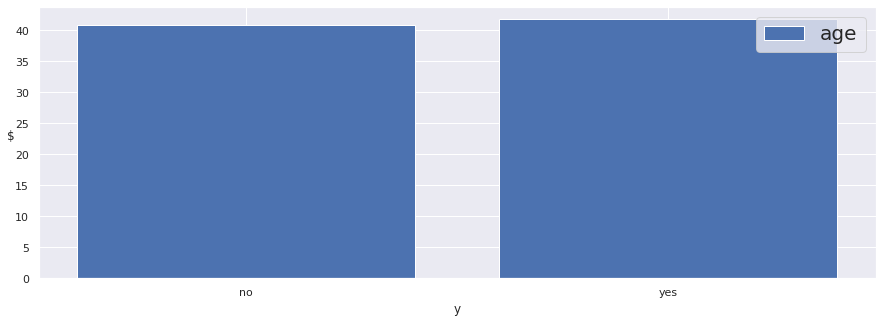

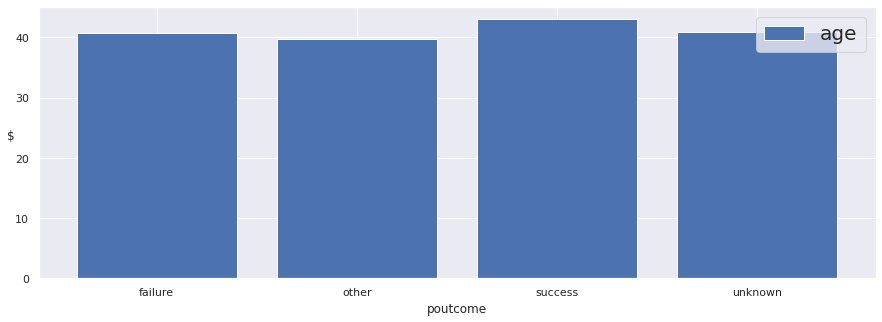

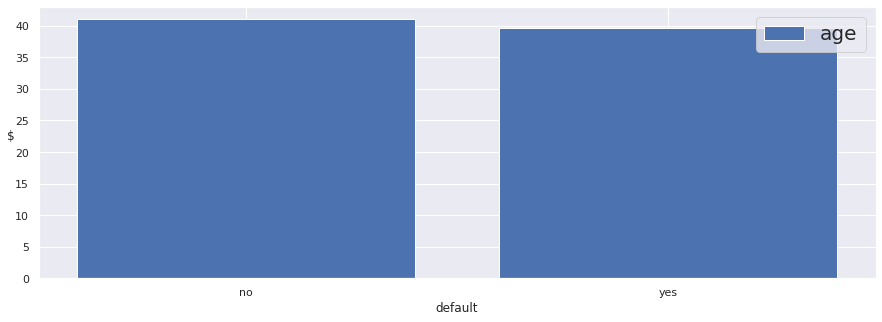

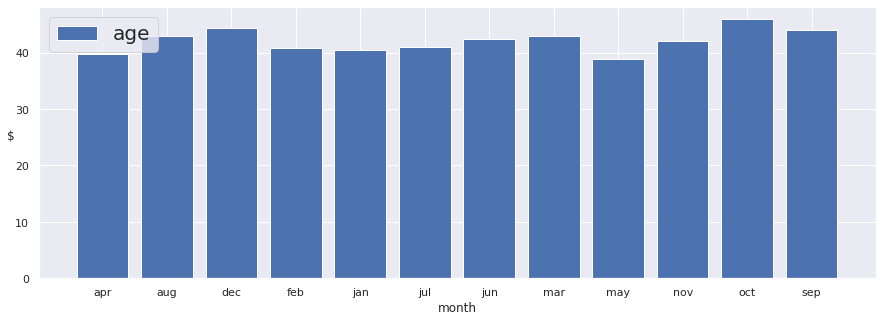

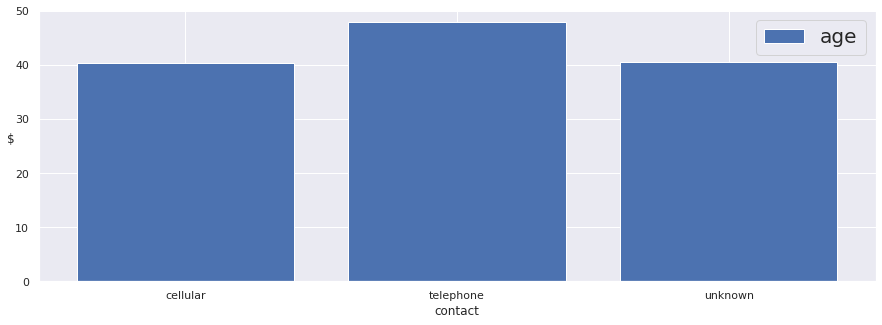

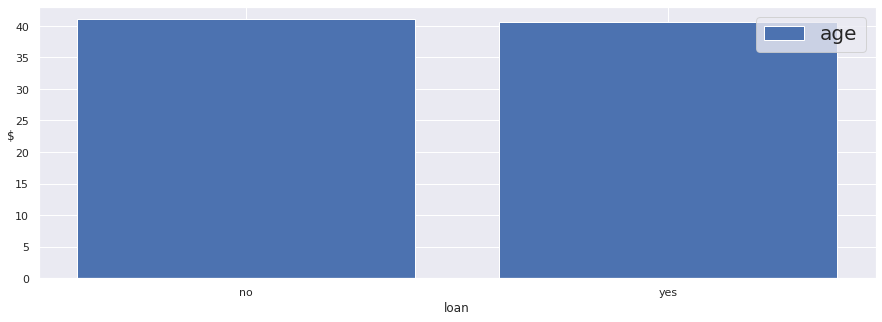

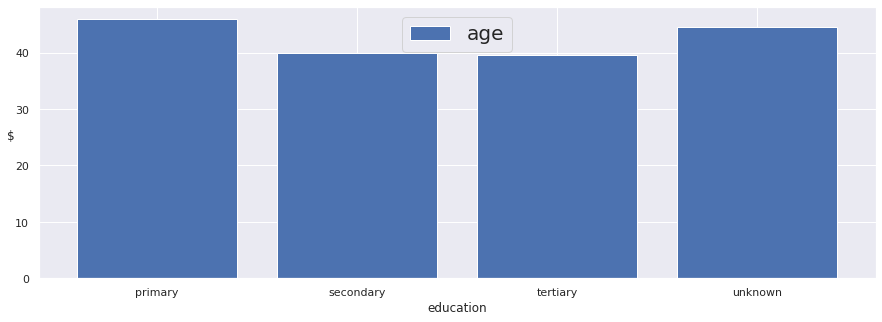

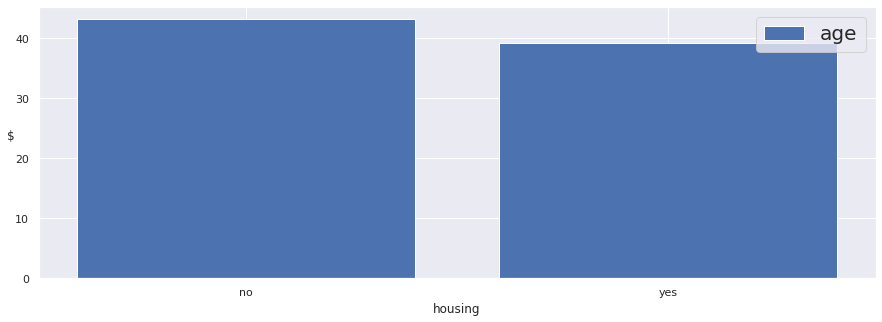

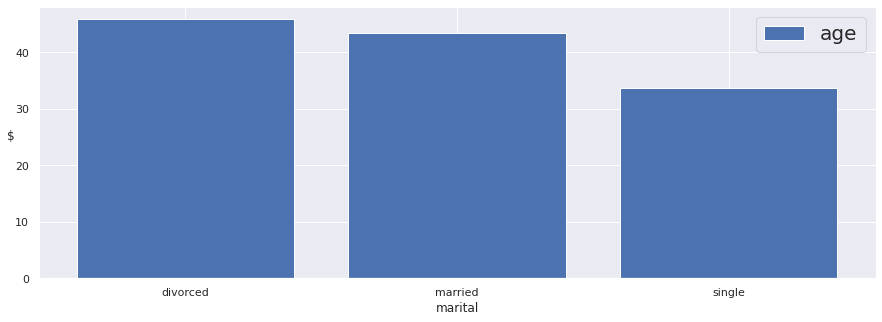

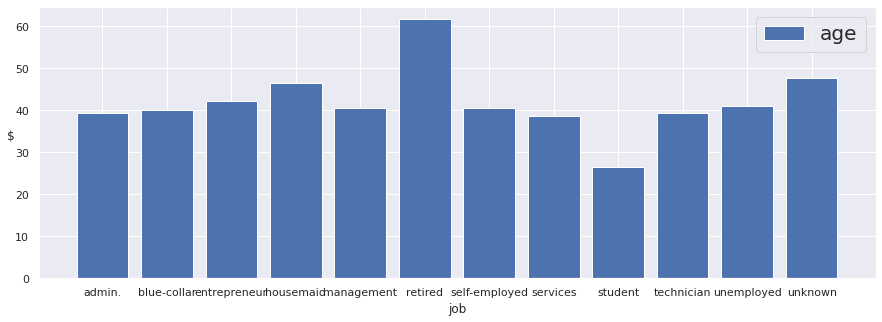

In [17]:
#Mean age of categories.
groupby_graph("age")

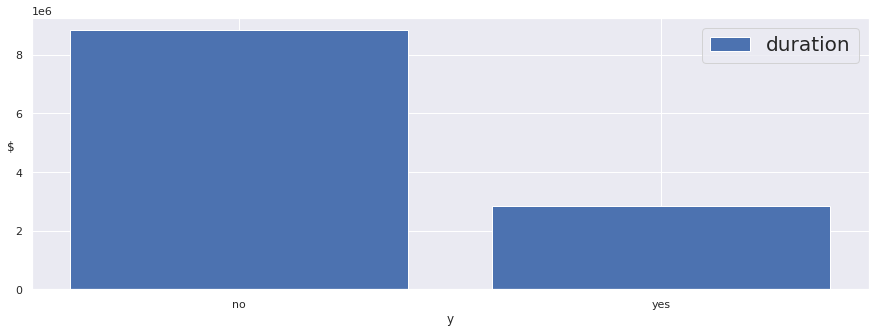

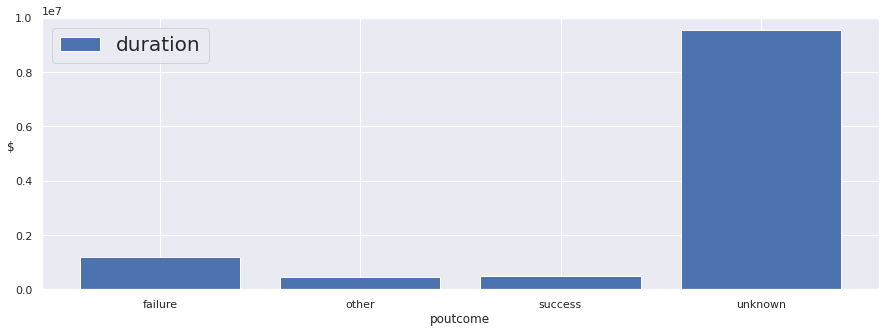

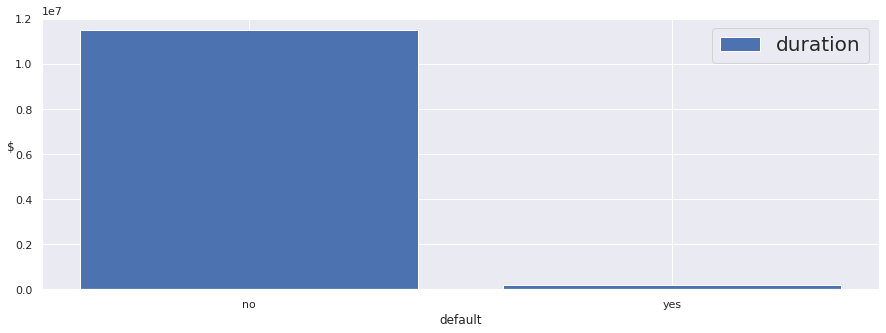

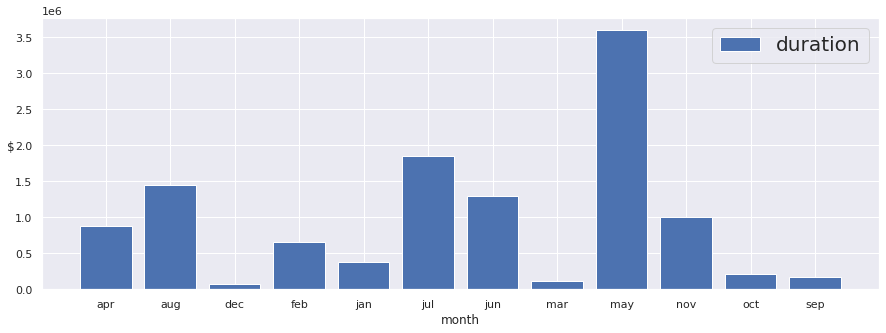

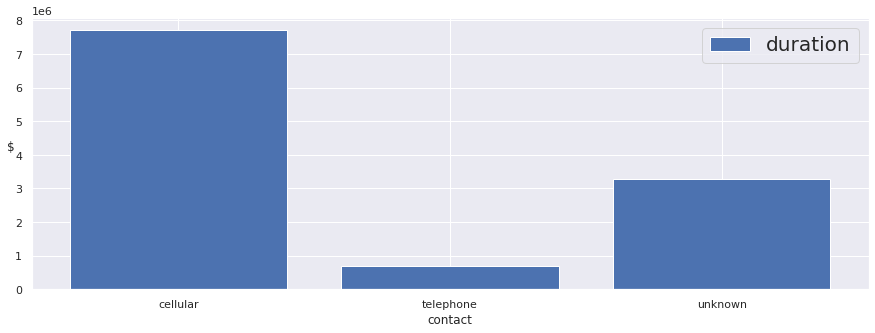

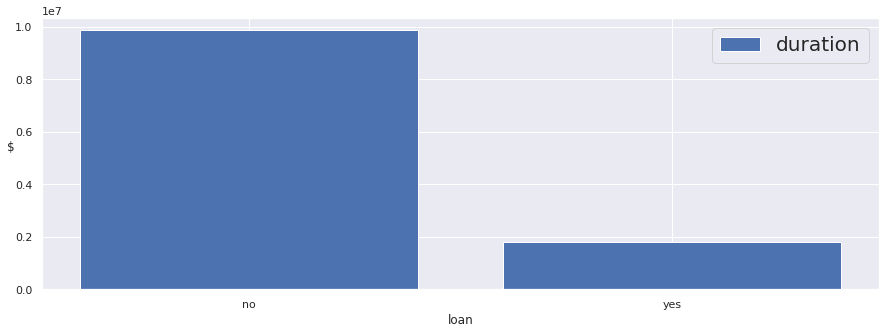

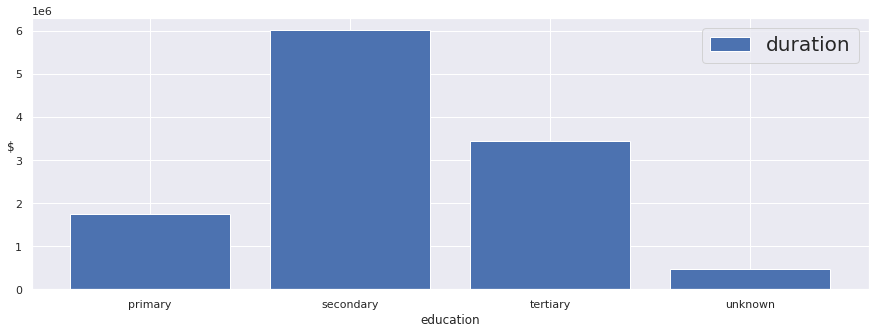

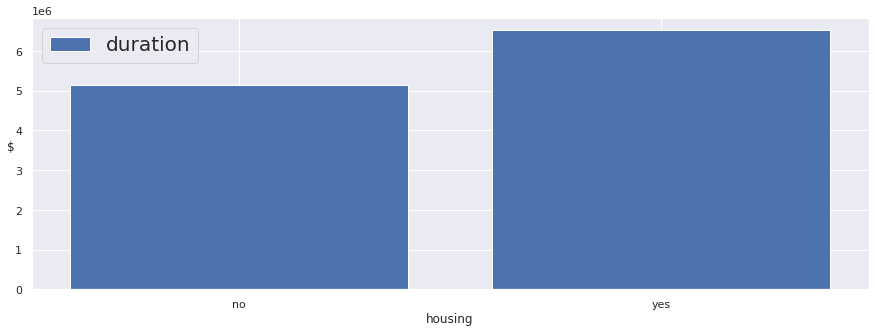

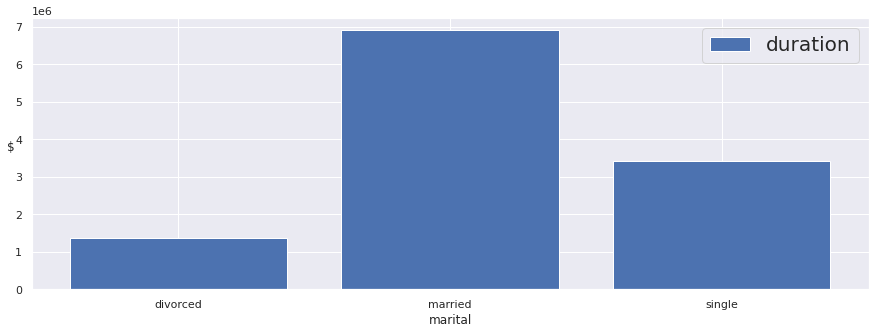

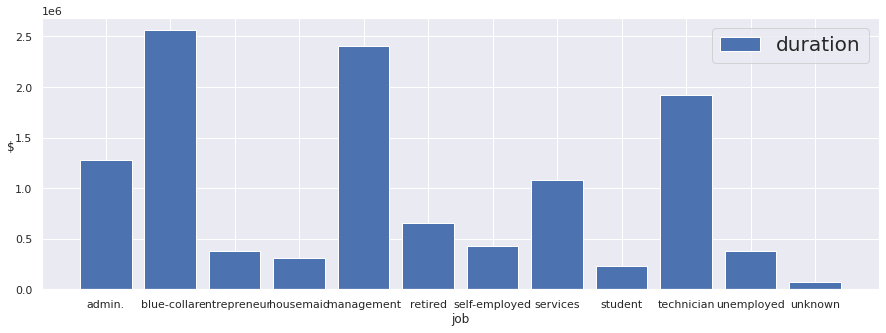

In [18]:
groupby_graph("duration","sum")
#Sum of durations of phone calls for each category.
#Longest phone calls happened with blue collar,married people.
#Also people who use cellphone talked more.
#Lots of time also spent on people who we don't know whether or not subscribed.
#More time on the phone spent on people who did not accept to subscribe than the ones who subscribed.Which goes to show lots of time spent on persuasion.

In [26]:
#Most of the customers who did not subscribe were blue collar workers,who has secondary education and has only housing loan.
df[["job","education","marital","housing","loan","y"]][df.y == "no"].describe()

,job,education,marital,housing,loan,y
count,39922,39922,39922,39922,39922,39922
unique,12,4,3,2,2,1
top,blue-collar,secondary,married,yes,no,no
freq,9024,20752,24459,23195,33162,39922


In [28]:
#People who had management jobs and has no housing loan were the ones who subscribed the most.
df[["job","education","marital","housing","loan","y"]][df.y == "yes"].describe()

,job,education,marital,housing,loan,y
count,5289,5289,5289,5289,5289,5289
unique,12,4,3,2,2,1
top,management,secondary,married,no,no,yes
freq,1301,2450,2755,3354,4805,5289


In [30]:
#There are 7.5 times more people who did not subscribe than subscribed ones.
len(df[df.y == "no"])/len(df[df.y == "yes"])

7.548118737001324